In [2]:
import torch
import numpy as np
from data.dataset_supervised import get_dataloaders
from utils.utils import get_model
from utils.eval import evaluate_binary, evaluate_multiclass

RUN = 0
RUN_DIR = f"/home/atari_ws/project/learning_jump_feasibility/logs/MLPclassifierBinary/{RUN}/MLP.pth"
DATA_PATH = "/home/atari_ws/data/learning_jump_feasibility"

model = get_model(state_path=RUN_DIR)

_, dataloader_test = get_dataloaders("classifier", 512, data_path=DATA_PATH, exclude="pos_vj")

acc, roc = evaluate_multiclass(model, dataloader_test)
print(acc, roc)
acc, roc = evaluate_binary(model, dataloader_test)
print(acc, roc)


Model number of trainable parameters: 5766
Model state restored at epoch 59
Train samples: 61338
Test samples: 6181
Train batch shape:
input : [512, 46]
target : [512, 6]
0.8228441999676428 0.5
0.8228441999676428 0.9333548805297737


In [2]:

RUN = 0
RUN_DIR = f"/home/atari_ws/project/learning_jump_feasibility/logs/MLP_regressor/{RUN}/MLP.pth"
DATA_PATH = "/home/atari_ws/data/learning_jump_feasibility"

model = get_model(state_path=RUN_DIR)
_, dataloader_test = get_dataloaders("regressor", 1024, data_path=DATA_PATH, exclude="pos_vj")

batch = next(iter(dataloader_test))
input = batch["input"]
target = batch["target"]

with torch.no_grad():
    output = model(input)
loss = torch.nn.functional.mse_loss(target, output, reduction="none")
print(torch.mean(loss))
avg_loss = torch.mean(loss, dim=0).squeeze()
std_loss = torch.std(loss, dim=0).squeeze()

Model number of trainable parameters: 17702
Model state restored at epoch 79
Train samples: 50278
Test samples: 5086
Train batch shape:
input : [1024, 1, 46]
target : [1024, 1, 34]
tensor(8.5001)


In [6]:
input_name = (
    ["quat"] * 4 + 
    ["vel"] * 3 + 
    ["w"] * 3 + 
    ["qj"] * 12 + 
    ["vj"] * 12 + 
    ["target"] * 12 +
    [""] * 2
)

desc_avg_name = [input_name[i] for i in torch.argsort(avg_loss, descending=True).tolist()]

avg_loss_list = dict.fromkeys(desc_avg_name)
avg_loss_cat = dict.fromkeys(desc_avg_name, 0.)

for i, l in enumerate(avg_loss):
    name = input_name[i]
    if avg_loss_list.get(name) is None:
        avg_loss_list[name] = []
    avg_loss_list[name].append(l.item())
    
for k, v in avg_loss_list.items():
    avg_loss_cat[k] = np.mean(v)
    
    
print(avg_loss_list)
print(avg_loss_cat)
# 

{'qj': [0.10690045356750488, 0.6890503168106079, 3.13859224319458, 0.3077511489391327, 0.09532419592142105, 3.21614933013916, 62.274742126464844, 0.11410447955131531, 1.883641004562378, 46.66141128540039, 52.155696868896484, 104.61266326904297], 'quat': [4.222333908081055, 0.2544001638889313, 0.08009009808301926, 2.042015552520752], 'w': [2.1381618976593018, 0.13444343209266663, 0.04933552443981171], 'vel': [1.552502155303955, 1.0429768562316895, 0.586811363697052], 'vj': [0.07547229528427124, 0.2880575954914093, 0.11831077933311462, 0.03759098798036575, 0.0825388953089714, 0.005105319432914257, 0.37936627864837646, 0.18459582328796387, 0.010145492851734161, 0.16422709822654724, 0.041502371430397034, 0.2587099075317383]}
{'qj': 22.938002226874232, 'quat': 1.6497099306434393, 'w': 0.7739802847305933, 'vel': 1.060763458410899, 'vj': 0.13713523706731698}


tensor([[ 0.2272,  0.1554, -0.2596,  0.2365, -0.1552, -0.2595, -0.1550,  0.1378,
         -0.2635, -0.1598, -0.1411, -0.2641]])
tensor([[0.0593, 0.0765, 0.0219, 0.0597, 0.0742, 0.0210, 0.0781, 0.0645, 0.0209,
         0.0653, 0.0702, 0.0206]])
tensor([[-1.7433e-02,  7.3336e-01, -1.7247e+00,  1.3408e-03,  7.4899e-01,
         -1.7278e+00, -1.7209e-02, -1.0983e-03,  6.5110e-01,  1.9083e-02,
         -7.2643e-01, -4.6117e-03]])
tensor([[0.2112, 0.2572, 0.1859, 0.2233, 0.2066, 0.1706, 0.1014, 0.1006, 0.0654,
         0.3966, 0.2187, 0.2075]])


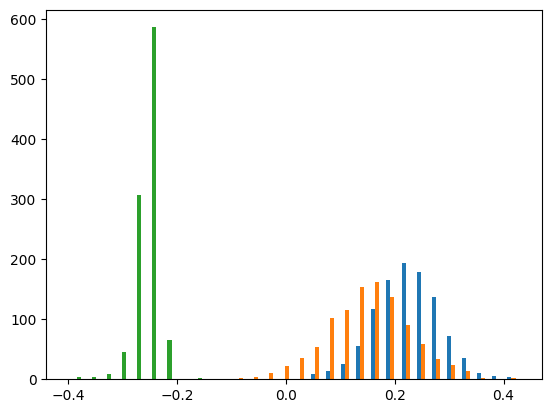

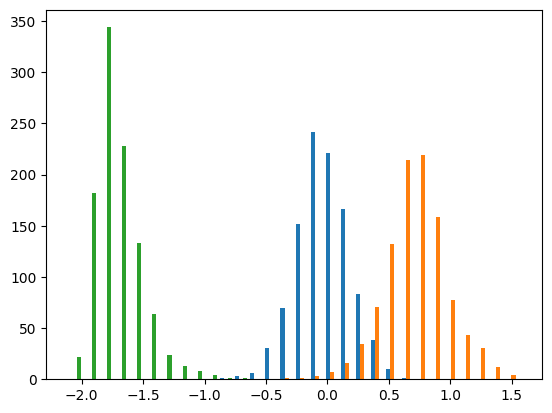

In [7]:
vj = input[:, :, 22:22+12]
qj = input[:, :, 10:22]
print(torch.mean(vj, dim=0))
print(torch.std(vj, dim=0))

print(torch.mean(qj, dim=0))
print(torch.std(qj, dim=0))

import matplotlib.pyplot as plt
plt.hist(vj[:, 0, :3], bins = 30)
plt.show()

plt.hist(qj[:, 0, :3], bins = 30)
plt.show()


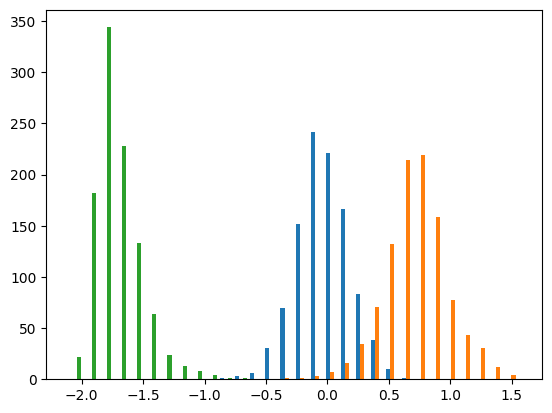

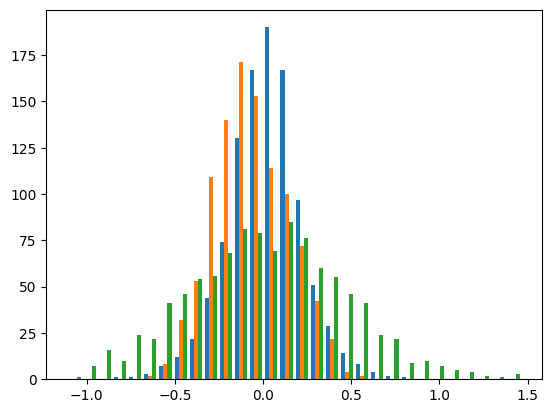

In [8]:
qj_pred = output[:, :, 10:22]
plt.hist(qj[:, 0, :3],bins = 30)
plt.show()

plt.hist(qj_pred[:, 0, :3], bins = 30)
plt.show()

In [9]:

i = torch.tensor([[ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.9000, -1.8000,  0.0000,
          0.9000, -1.8000,  0.0000,  0.9000, -1.8000,  0.0000,  0.9000, -1.8000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3600,  0.1400,
         -0.3100,  0.3600, -0.1400, -0.3100,  0.0000,  0.1400, -0.3100,  0.0000,
         -0.1400, -0.3100,  0.1934,  0.1420, -0.2998,  0.1934, -0.1420, -0.2998,
         -0.1934,  0.1420, -0.2998, -0.1934, -0.1420, -0.2998]])

print(input[1])
out = model(i.unsqueeze(0))
print(out)

tensor([[ 1.5788e-03,  1.0302e-02, -3.0832e-04,  9.9995e-01, -1.1081e-02,
          9.0187e-01, -1.9978e+00, -7.2030e-03,  7.3935e-01, -1.9650e+00,
         -7.5908e-02,  9.5242e-01, -1.9843e+00,  6.0734e-02,  8.9802e-01,
         -1.9793e+00,  7.1745e-02,  2.7253e-03,  6.3341e-01,  2.6038e-03,
         -8.2051e-01,  9.1498e-03,  2.0168e-01,  1.4562e-01, -2.4538e-01,
          2.1336e-01, -1.2150e-01, -2.4535e-01, -1.1700e-01,  9.5705e-02,
         -2.4600e-01, -8.3756e-02, -1.2586e-01, -2.4598e-01,  2.1574e-01,
          1.3945e-01, -2.3052e-01,  2.5032e-01, -1.4365e-01, -2.2875e-01,
         -1.8415e-01,  1.2407e-01, -2.3937e-01, -1.7200e-01, -1.2769e-01,
         -2.3825e-01]])
tensor([[[ 1.8165e+00,  2.4464e-01,  1.6646e-01, -2.8257e-01, -2.8457e-01,
          -3.6396e-01, -3.3085e-01,  4.9300e-01,  3.8257e-01, -1.5168e+00,
          -3.2991e-02, -5.7076e-01,  4.0505e-01, -7.3900e-01,  7.9635e-01,
           2.5217e-01, -9.8541e+00, -6.2373e-03, -8.1653e-01,  8.7185e+00,
          